# K Means Clustering Project 

We actually have the labels for this data set, but I am not going to use them for the KMeans clustering algorithm, since that is an unsupervised learning algorithm. When using the Kmeans algorithm under normal circumstances, it is because you don't have labels. I will use them to evaluate the performace of the algorithm. But the evaluation reports I'm be generating are never created for this type of technique
___

## The Data

We will use a data frame with 777 observations on the following 18 variables.
* Private A factor with levels No and Yes indicating private or public university
* Apps Number of applications received
* Accept Number of applications accepted
* Enroll Number of new students enrolled
* Top10perc Pct. new students from top 10% of H.S. class
* Top25perc Pct. new students from top 25% of H.S. class
* F.Undergrad Number of fulltime undergraduates
* P.Undergrad Number of parttime undergraduates
* Outstate Out-of-state tuition
* Room.Board Room and board costs
* Books Estimated book costs
* Personal Estimated personal spending
* PhD Pct. of faculty with Ph.D.’s
* Terminal Pct. of faculty with terminal degree
* S.F.Ratio Student/faculty ratio
* perc.alumni Pct. alumni who donate
* Expend Instructional expenditure per student
* Grad.Rate Graduation rate

## Import Libraries


In [5]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

## Get the Data

In [9]:
col = pd.read_csv("./data/College_Data", index_col=0)

In [10]:
col.head()

Private  Apps  Accept  Enroll  Top10perc  \
Abilene Christian University     Yes  1660    1232     721         23   
Adelphi University               Yes  2186    1924     512         16   
Adrian College                   Yes  1428    1097     336         22   
Agnes Scott College              Yes   417     349     137         60   
Alaska Pacific University        Yes   193     146      55         16   

                              Top25perc  F.Undergrad  P.Undergrad  Outstate  \
Abilene Christian University         52         2885          537      7440   
Adelphi University                   29         2683         1227     12280   
Adrian College                       50         1036           99     11250   
Agnes Scott College                  89          510           63     12960   
Alaska Pacific University            44          249          869      7560   

                              Room.Board  Books  Personal  PhD  Terminal  \
Abilene Christian University        3300    450      2200   70        78   
Adelphi University                  6450    750      1500   29        30   
Adrian College                      3750    400      1165   53        66   
Agnes Scott College                 5450    450       875   92        97   
Alaska Pacific University           4120    800      1500   76        72   

                              S.F.Ratio  perc.alumni  Expend  Grad.Rate  
Abilene Christian University       18.1           12    7041         60  
Adelphi University                 12.2           16   10527         56  
Adrian College                     12.9           30    8735         54  
Agnes Scott College                 7.7           37   19016         59  
Alaska Pacific University          11.9            2   10922         15

In [11]:
col.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Private      777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: 

**What university has the most enrollments?**

In [12]:
col['Enroll'].idxmax()

'Texas A&M Univ. at College Station'

## EDA

**Grad.Rate** versus **Room.Board** where the points are colored by the **Private column**

<AxesSubplot:xlabel='Room.Board', ylabel='Grad.Rate'>

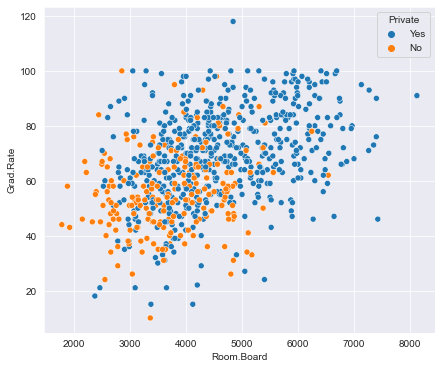

In [13]:
plt.figure(figsize = (7,6))
sns.set_style("darkgrid")
sns.scatterplot(x = 'Room.Board', y = 'Grad.Rate', data = col, hue = 'Private')

**F.Undergrad** versus **Outstate** where the points are colored by the **Private column**

<AxesSubplot:xlabel='Outstate', ylabel='F.Undergrad'>

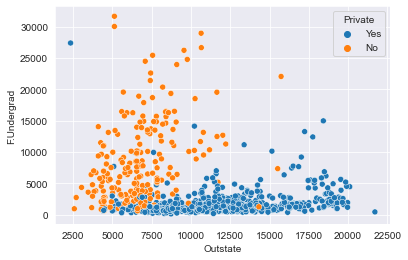

In [14]:
sns.scatterplot(x = 'Outstate', y = 'F.Undergrad', data = col, hue = 'Private')

Stacked histogram showing **Out of State Tuition** based on the **Private column**.

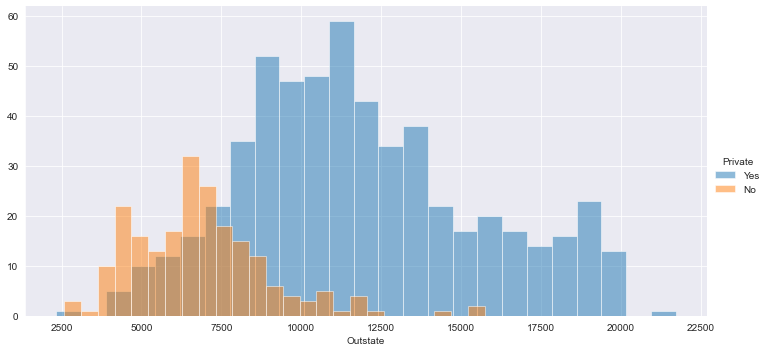

In [15]:
g = sns.FacetGrid(col, hue='Private', height = 5, aspect=2)
g.map(plt.hist, "Outstate", bins = 25, alpha = 0.5)
g.add_legend()

Stacked histogram showing **Grad.Rate** based on the **Private column**.

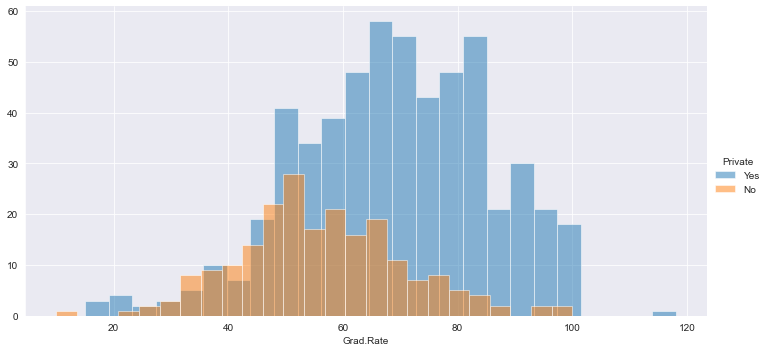

In [18]:
g = sns.FacetGrid(col, hue='Private', height = 5, aspect=2)
g.map(plt.hist, "Grad.Rate", bins = 25, alpha = 0.5)
g.add_legend()

**There seems to be a private school with a graduation rate of higher than 100%. What is the name of that school?**

In [19]:
col['Grad.Rate'].idxmax()

'Cazenovia College'

**Lets set that school's graduation rate to 100 so it makes sense**

In [20]:
col['Grad.Rate']['Cazenovia College'] = 100

C:\Users\Shams El-Fouly\AppData\Local\Temp\ipykernel_6700\3325809285.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  col['Grad.Rate']['Cazenovia College'] = 100


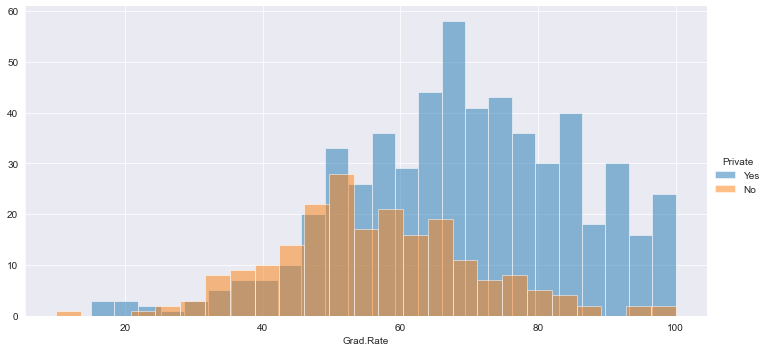

In [21]:
g = sns.FacetGrid(col, hue='Private', height = 5, aspect=2)
g.map(plt.hist, "Grad.Rate", bins = 25, alpha = 0.5)
g.add_legend()

## K Means Cluster Creation

In [23]:
from sklearn.cluster import KMeans

**Step1: Create an instance of a K Means model with 2 clusters**

In [24]:
model = KMeans(n_clusters=2)

**Step2: Fit the model to all the data except for the Private label.**

In [25]:
model.fit(col.drop('Private', axis = 1))

KMeans(n_clusters=2)

**What are the cluster center vectors?**

In [140]:
model.cluster_centers_

array([[1.03631389e+04, 6.55089815e+03, 2.56972222e+03, 4.14907407e+01,
        7.02037037e+01, 1.30619352e+04, 2.46486111e+03, 1.07191759e+04,
        4.64347222e+03, 5.95212963e+02, 1.71420370e+03, 8.63981481e+01,
        9.13333333e+01, 1.40277778e+01, 2.00740741e+01, 1.41705000e+04,
        6.75925926e+01],
       [1.81323468e+03, 1.28716592e+03, 4.91044843e+02, 2.53094170e+01,
        5.34708520e+01, 2.18854858e+03, 5.95458894e+02, 1.03957085e+04,
        4.31136472e+03, 5.41982063e+02, 1.28033632e+03, 7.04424514e+01,
        7.78251121e+01, 1.40997010e+01, 2.31748879e+01, 8.93204634e+03,
        6.50926756e+01]])

## Evaluation

** Convert the yes/no into 0/1 by pd.get_dummies **

In [31]:
private = pd.get_dummies(col['Private'], drop_first=True)

** Create a confusion matrix and classification report to see how well the Kmeans clustering worked without being given any labels.**

In [33]:
from sklearn.metrics import classification_report, confusion_matrix

In [34]:
print(confusion_matrix(private, model.labels_))
print(classification_report(private, model.labels_))

[[ 74 138]
 [ 34 531]]
              precision    recall  f1-score   support

           0       0.69      0.35      0.46       212
           1       0.79      0.94      0.86       565

    accuracy                           0.78       777
   macro avg       0.74      0.64      0.66       777
weighted avg       0.76      0.78      0.75       777

